In [1]:
import os
os.environ["SCIPY_ARRAY_API"] = "1"

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [5]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [6]:
df.drop(columns=["Unnamed: 0", "Booking_ID"], inplace=True)

In [7]:
df.head()
df.shape

(29020, 18)

In [8]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
df.duplicated().sum()

7661

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(21359, 18)

In [12]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [13]:
df["no_of_adults"].value_counts()

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

## Our data is imbalanced

In [14]:
cat_cols = [
    'type_of_meal_plan',
    'required_car_parking_space',
    'room_type_reserved',
    'market_segment_type',
    'repeated_guest',
    'booking_status'
]

num_cols = [
    'no_of_adults',
    'no_of_children',
    'no_of_weekend_nights',
    'no_of_week_nights',
    'lead_time',
    'arrival_year', 
    'arrival_month',
    'arrival_date',
    'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled',
    'avg_price_per_room', 
    'no_of_special_requests'
]

# DATA ANALYSIS

In [15]:
data = df.copy()
data.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


## UNIVARIATE ANALYSIS

In [16]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))
    if len(num_features) == 1:
        axes=[axes]
        
    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, bins=30, ax=axes[i][0], kde=True, color='skyblue')
        axes[i][0].set_title(f"Histogram for {column}")
        
        sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")
        
    plt.tight_layout()
    plt.show()

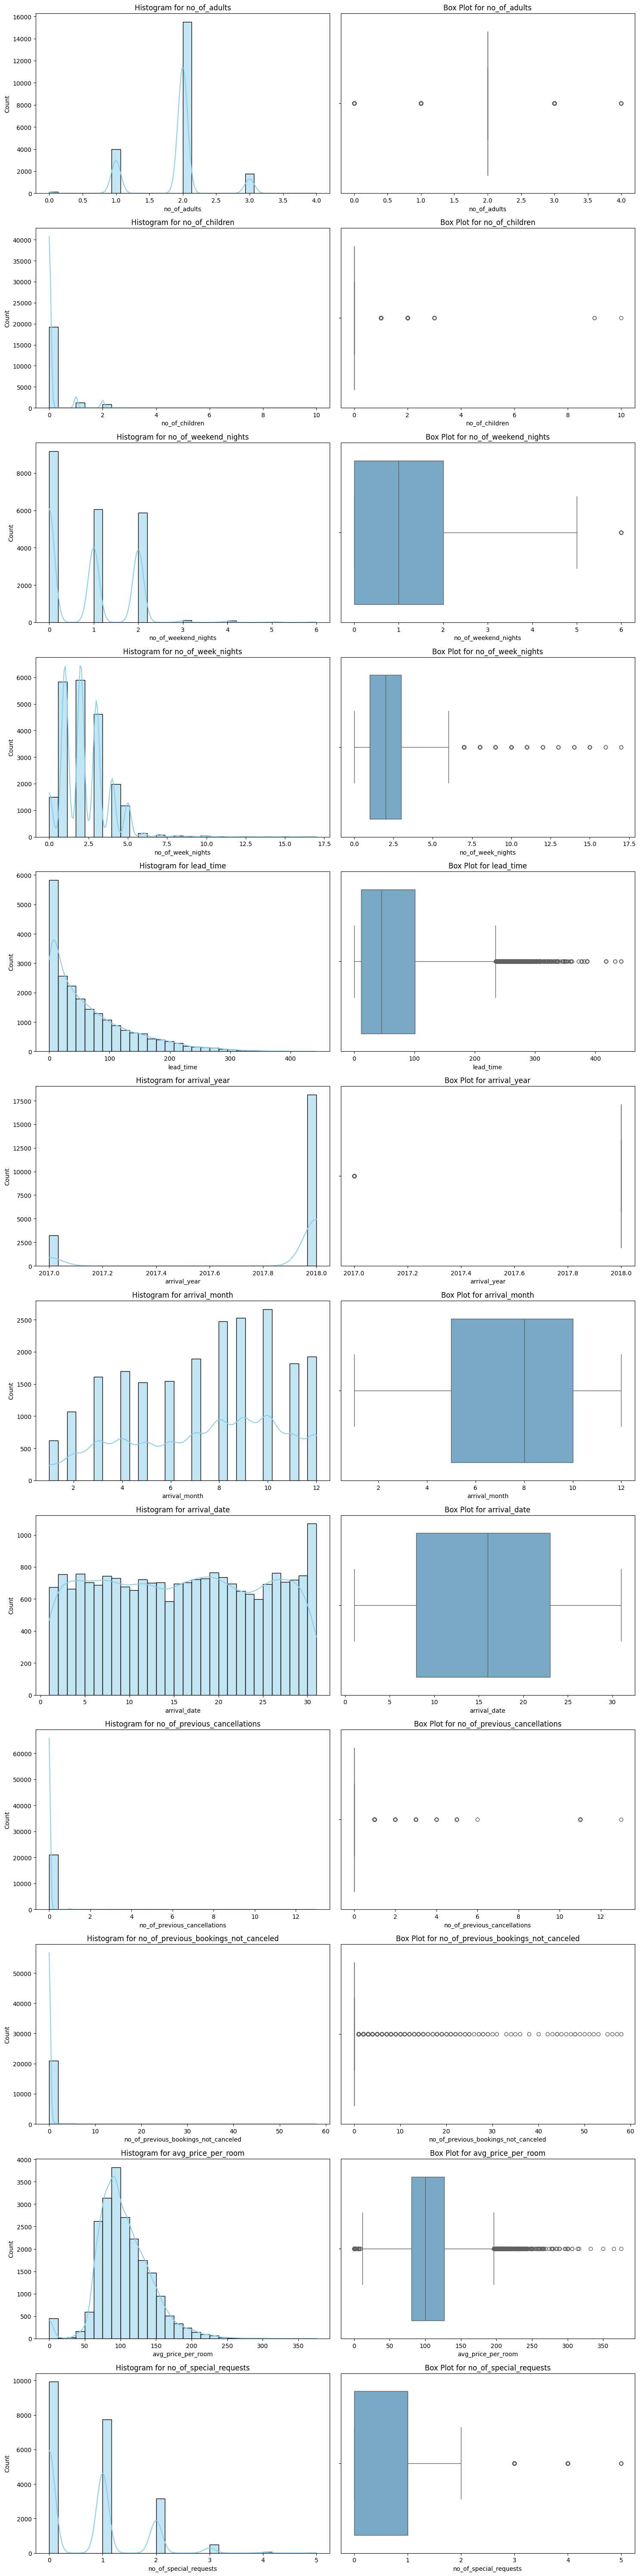

In [17]:
num_plot_dist(data, num_cols)

In [18]:
def plot_cat_distributions(data, cat_cols, cols=2):
    rows = (len(cat_cols) + cols -1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows *5))
    axes = axes.flatten()
    
    for i, col in enumerate(cat_cols):
        data[col].value_counts().plot(kind="bar", ax=axes[i], color="skyblue")
        axes[i].set_title(f"{col} Distribution")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")
        
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

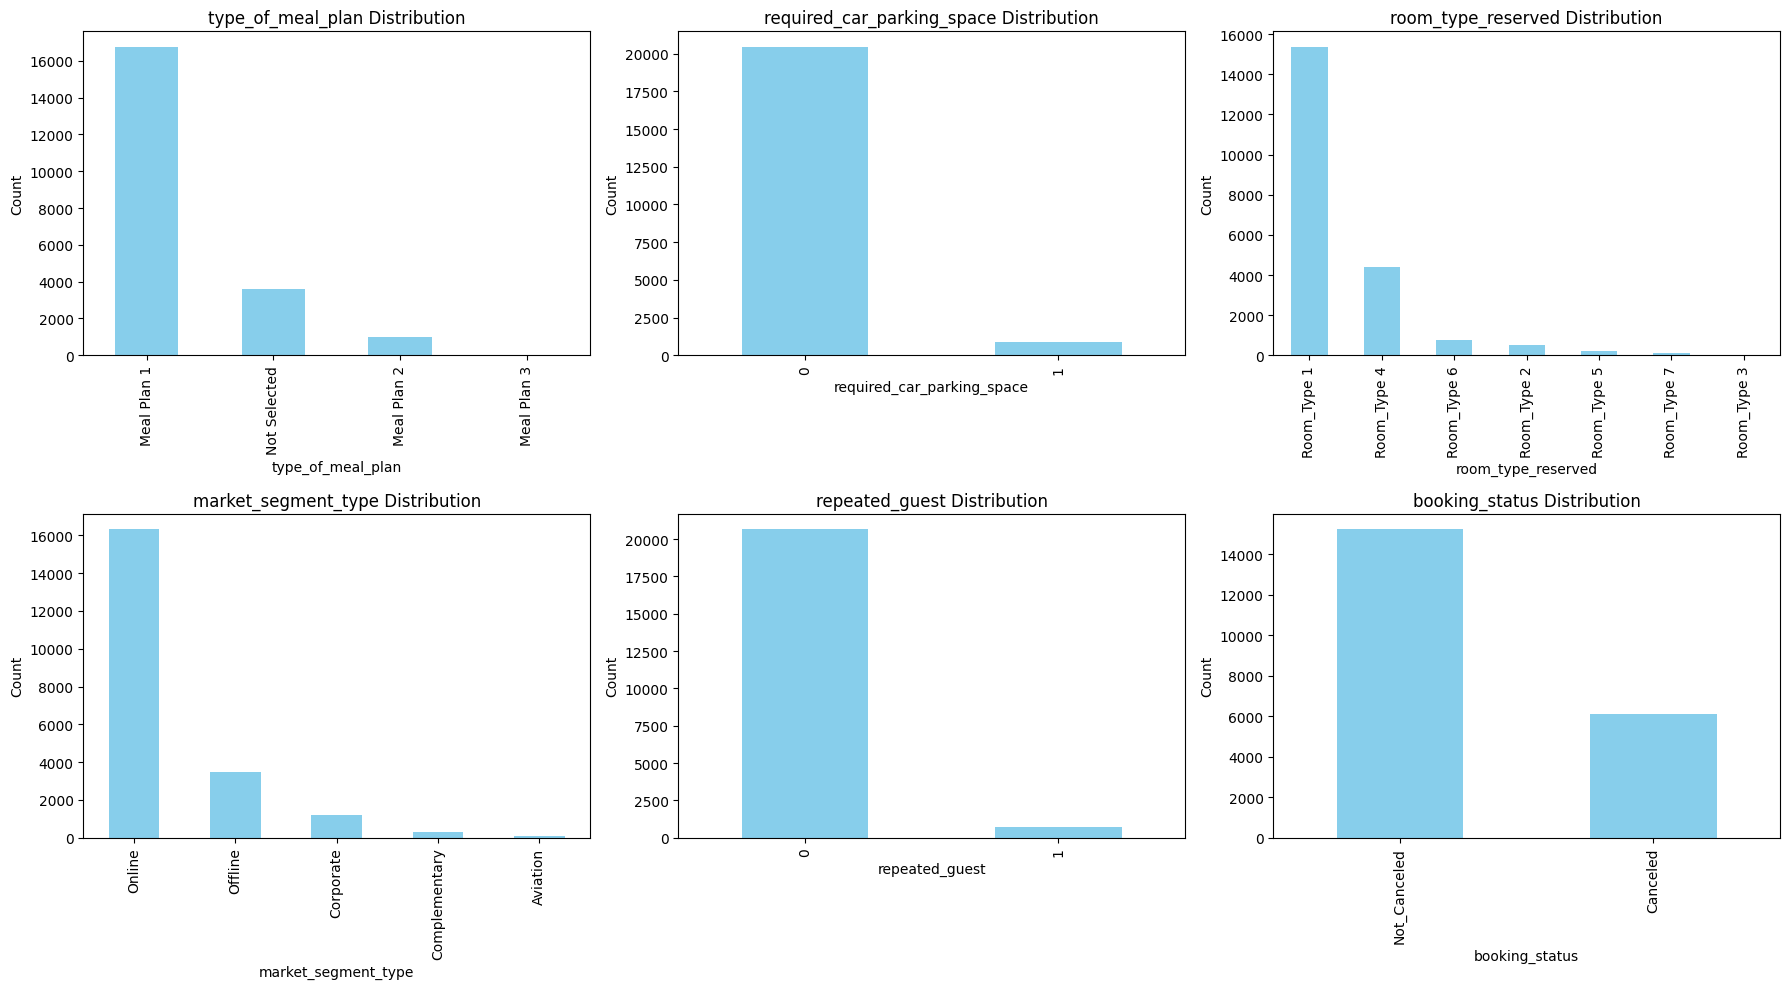

In [19]:
plot_cat_distributions(data, cat_cols, cols=3)

## Bi-variate Analysis

In [20]:
def plot_bivariate_num(df, target, num_features, cols = 3):
    
    num_plots = len(num_features)
    num_rows = ((num_plots) + cols - 1)  // cols
    
    fig, axes = plt.subplots(num_rows, cols, figsize=(cols * 6, num_rows * 5))
    axes = axes.flatten()
    
    for i, coloumn in enumerate(num_features):
        sns.boxplot(x=target, y=coloumn, ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f"{coloumn} VS {target}")
    
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

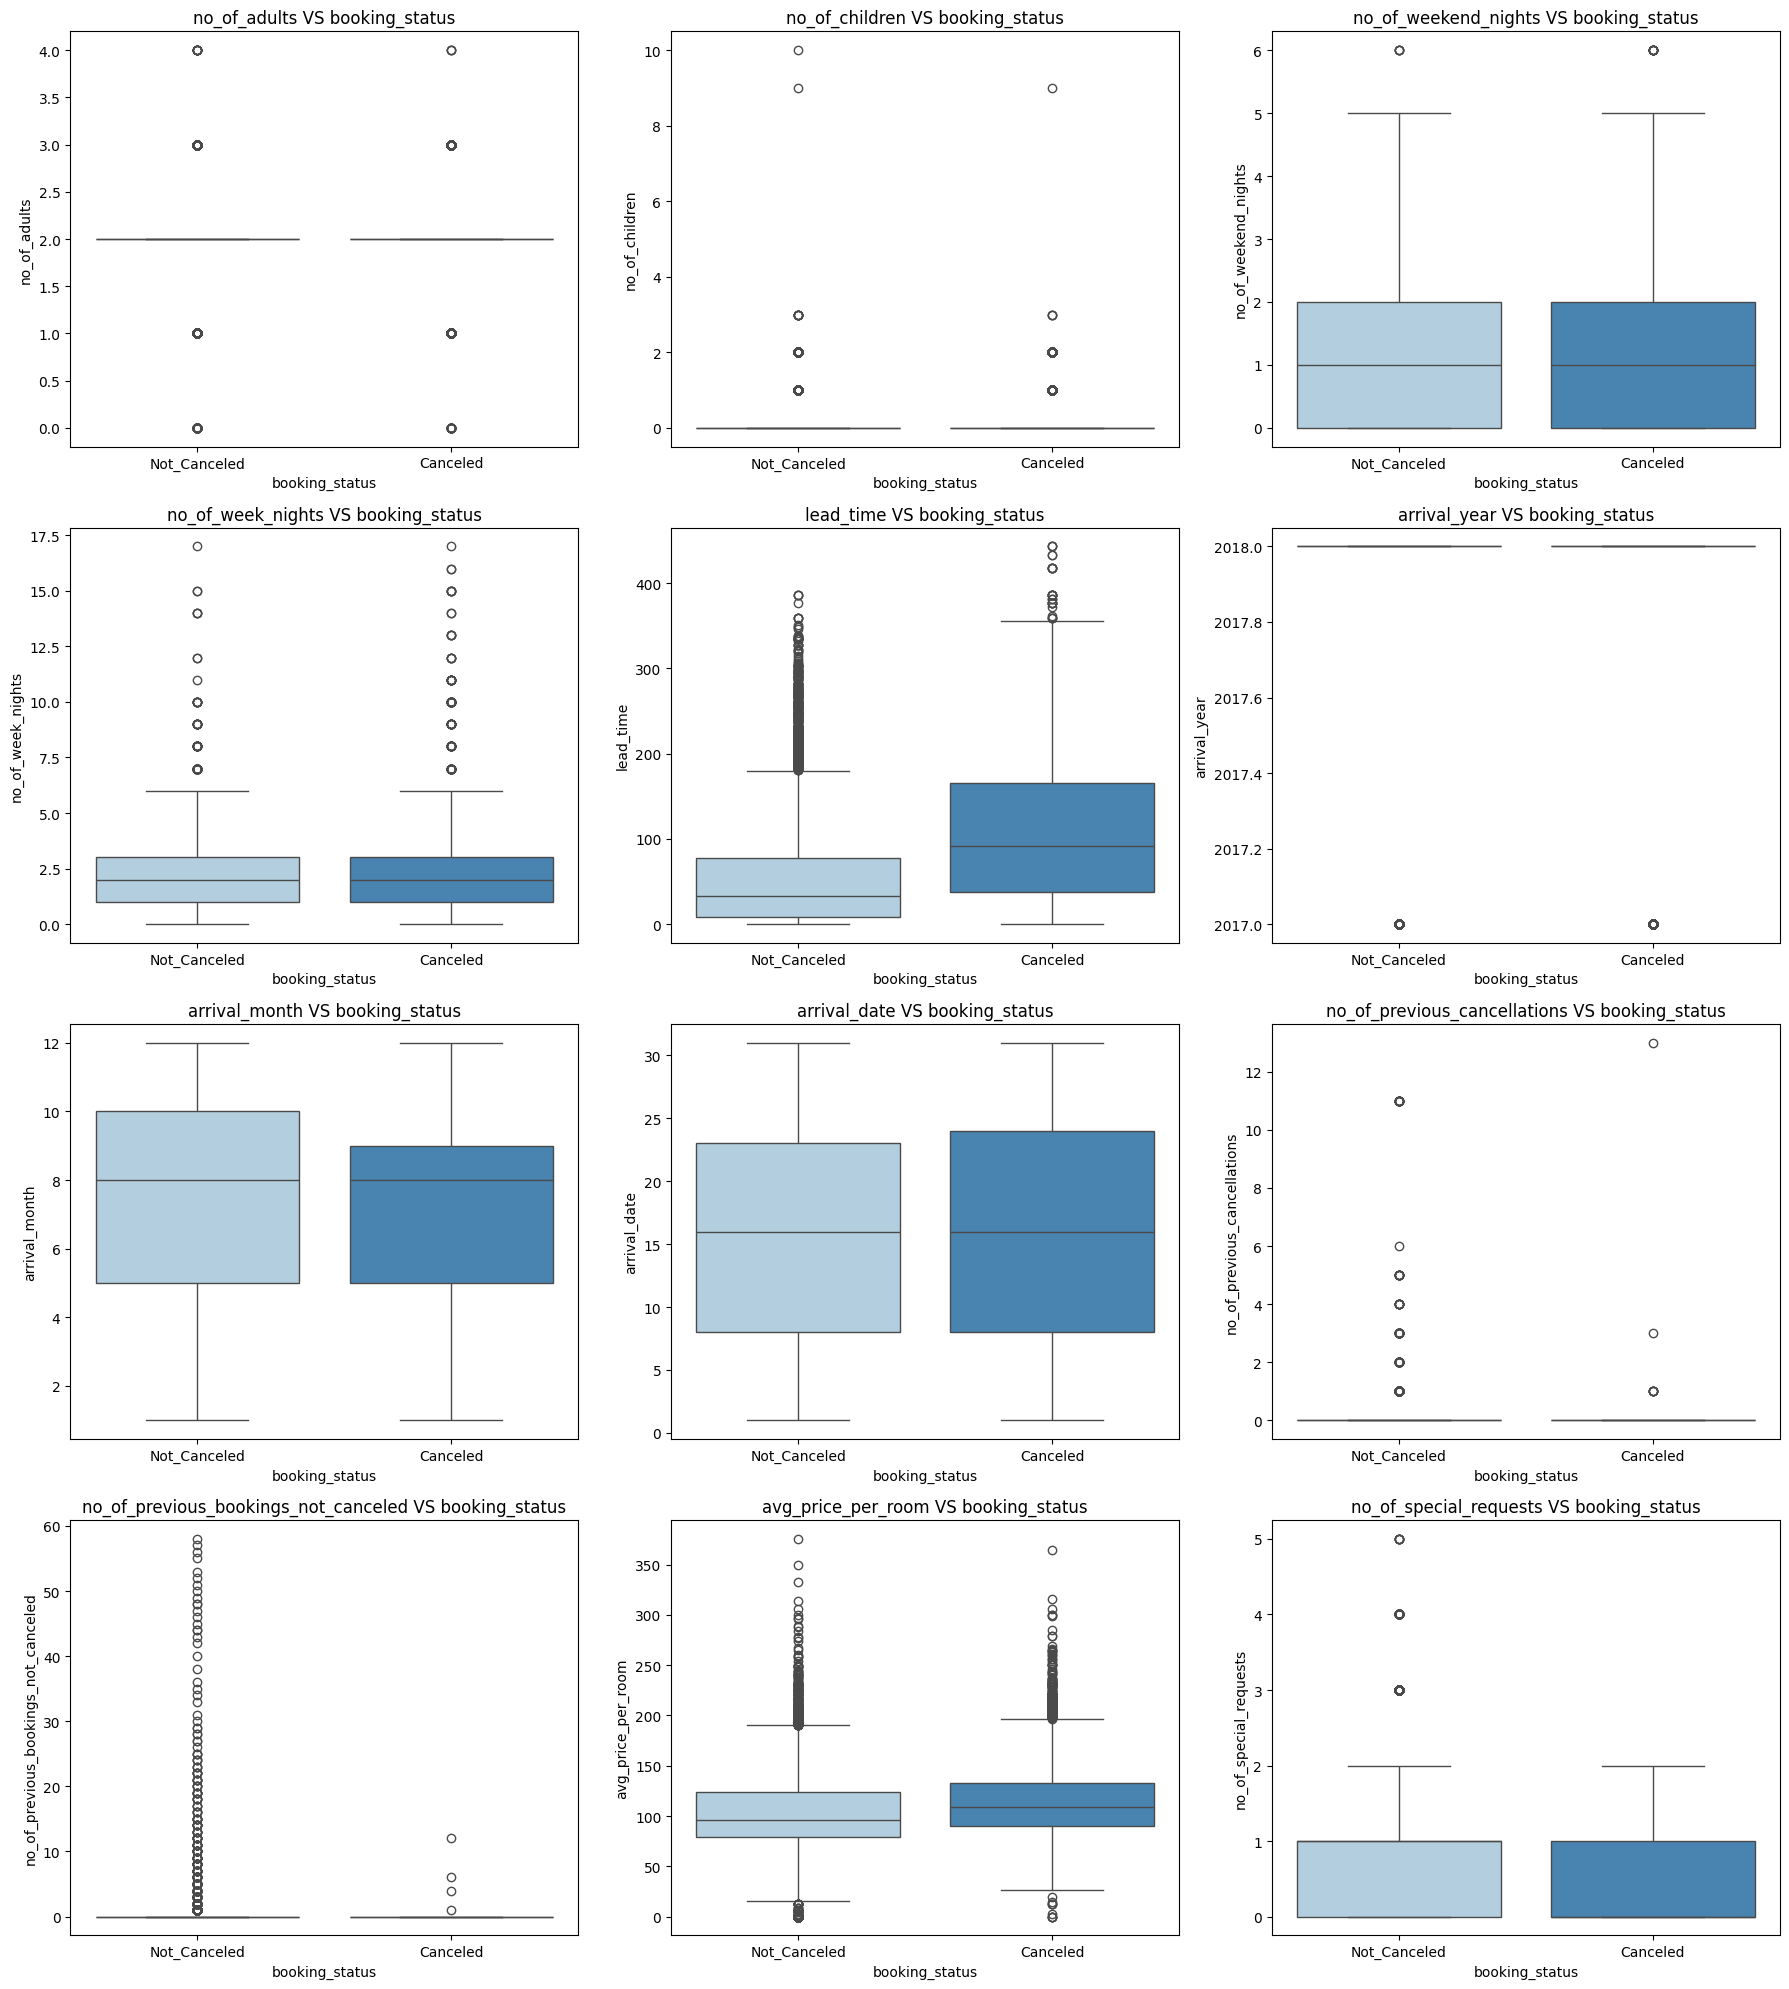

In [21]:
plot_bivariate_num(data, "booking_status", num_cols, cols=3)

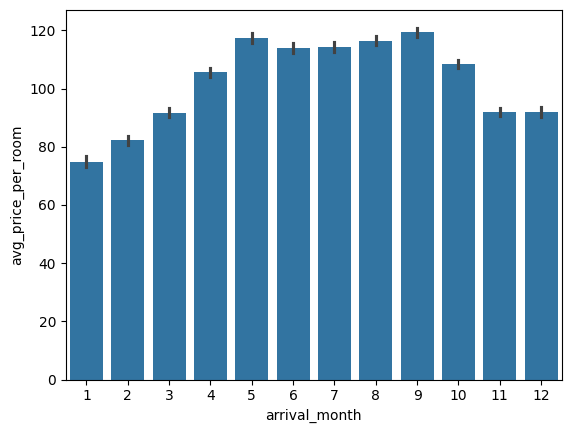

In [22]:
sns.barplot(x="arrival_month", y="avg_price_per_room", data=data)
plt.show()

In [23]:
def plot_bivariate_cat(df, target, cat_features, cols=3):
    
    num_plots = len(cat_features)
    num_rows = ((num_plots) + cols - 1)  // cols
    
    fig, axes = plt.subplots(num_rows, cols, figsize=(cols * 6, num_rows * 5))
    axes = axes.flatten()
    
    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, ax=axes[i], data=df, palette="Set2")
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis="x", rotation=90)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

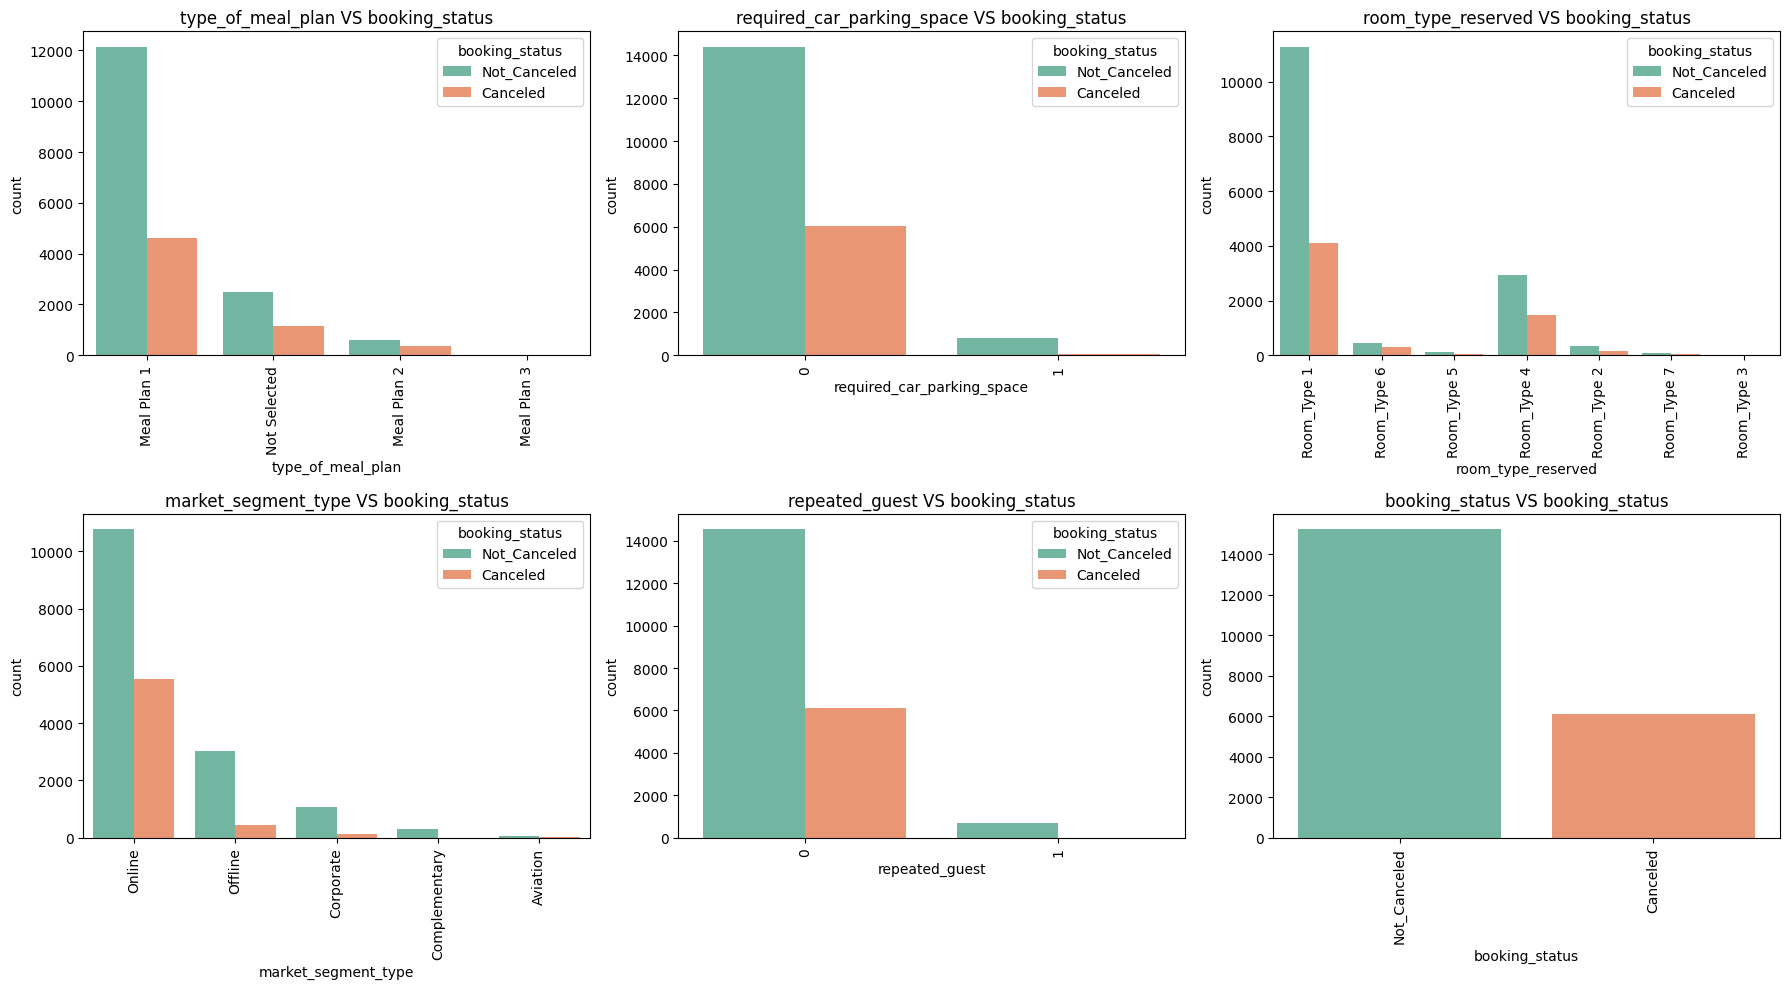

In [24]:
plot_bivariate_cat(data, "booking_status", cat_cols, cols=3)

# DATA PROCESSING

In [25]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

### Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
    mappings[col] = {label:code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}
    

In [28]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': 0,
  'Meal Plan 2': 1,
  'Meal Plan 3': 2,
  'Not Selected': 3},
 'required_car_parking_space': {0: 0, 1: 1},
 'room_type_reserved': {'Room_Type 1': 0,
  'Room_Type 2': 1,
  'Room_Type 3': 2,
  'Room_Type 4': 3,
  'Room_Type 5': 4,
  'Room_Type 6': 5,
  'Room_Type 7': 6},
 'market_segment_type': {'Aviation': 0,
  'Complementary': 1,
  'Corporate': 2,
  'Offline': 3,
  'Online': 4},
 'repeated_guest': {0: 0, 1: 1},
 'booking_status': {'Canceled': 0, 'Not_Canceled': 1}}

In [29]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int32  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int32  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

### Multicollinearity 

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df)
vif_data = pd.DataFrame()

vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [32]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


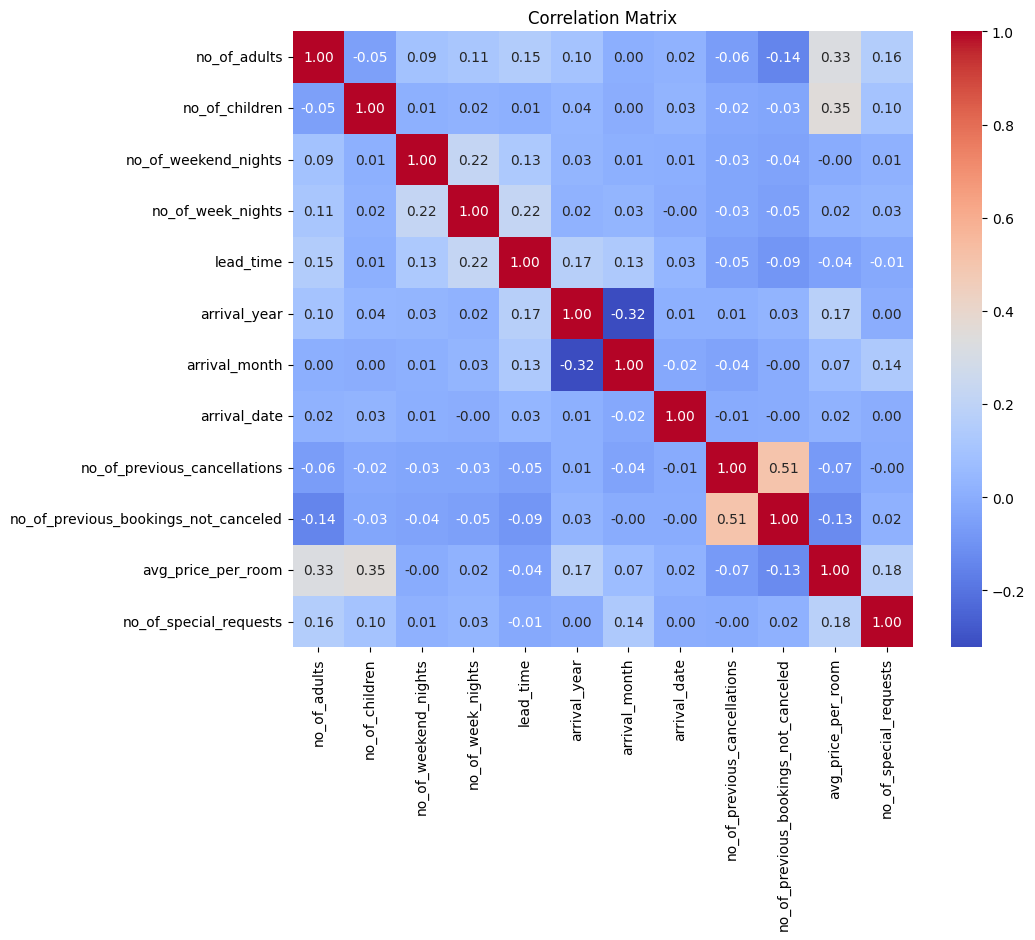

In [33]:
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Data doesnt have any multicollinearity

### Skewness

In [34]:
skewness = df.skew()

In [35]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [36]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])


### Imbalanced Data

In [37]:
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [38]:
X = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [39]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [40]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [41]:
from imblearn.over_sampling import SMOTE
import sklearn
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)

In [42]:
y_res

0        1
1        1
2        0
3        1
4        0
        ..
30457    0
30458    0
30459    0
30460    0
30461    0
Name: booking_status, Length: 30462, dtype: int32

In [43]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [44]:
df.shape

(21359, 18)

In [45]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df["booking_status"] = y_res

In [46]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [47]:
balanced_df.shape

(30462, 18)

In [48]:
df = balanced_df.copy()
df.shape

(30462, 18)

### Feature Selection

In [49]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=["booking_status"])
y = df["booking_status"]

model= RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [51]:
feature_importance = model.feature_importances_

In [52]:
feature_importance_df = pd.DataFrame({
    "feature":X.columns,
    "importance":feature_importance
})

In [55]:
top_features_importance_df = feature_importance_df.sort_values(by="importance", ascending=False)

In [62]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [63]:
top_10_df.head(10)

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0
5,74,1,112.50,4,6,4,3,0,0,0,0
6,273,0,95.00,5,13,3,2,1,0,0,0
7,6,0,66.30,12,15,4,3,1,3,0,1
8,89,1,83.66,3,21,4,5,2,0,0,1
9,56,1,180.00,3,20,4,0,2,0,5,0


In [64]:
df = top_10_df.copy()

### MODEL SELECTION

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


In [67]:
X = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
    "GradientBoostingClassifier":GradientBoostingClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBOOST": XGBClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "LGBM": LGBMClassifier(random_state=42)
}



In [69]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

In [70]:
for model_name , classifier in classifiers.items():
    classifier.fit(X_train , y_train)
    
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

In [71]:
metrics_df = pd.DataFrame(metrics)

metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.890694,0.894357,0.887948,0.891141
1,LogisticRegression,0.774003,0.804168,0.728990,0.764736
2,GradientBoostingClassifier,0.836698,0.820711,0.864821,0.842189
3,SVC,0.720499,0.729902,0.706840,0.718186
4,DecisionTreeClassifier,0.834564,0.842297,0.826384,0.834265
5,KNN,0.779419,0.856907,0.674919,0.755102
6,Naive Bayes,0.773511,0.803738,0.728339,0.764183
7,XGBOOST,0.874282,0.872093,0.879479,0.875770
8,AdaBoost,0.805186,0.802053,0.814332,0.808146
9,LGBM,0.865419,0.852886,0.885668,0.868968


#### TRAIN OUR RANDOM FOREST MODEL

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X = df.drop(columns=["booking_status"])
y = df["booking_status"]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)

In [83]:
params_dist = {
    'n_estimators': randint(100, 500),
    "max_depth": randint(10, 50),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5),
    "bootstrap": [True, False],
}

In [84]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    scoring="accuracy"
)

In [85]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.2s
[C

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002233CE809B0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002233CE82DB0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002233CE81C70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002233CF87680>},
                   random_state=42, scoring='accuracy', verbose=2)

In [86]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 22,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 458}

In [87]:
best_rf_model = random_search.best_estimator_

In [88]:
y_pred = best_rf_model.predict(X_test)

In [89]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [90]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8946331856228459
Precision: 0.8954397394136808
Recall: 0.8954397394136808
F1 Score: 0.8954397394136808


### Saving the Model

In [91]:
import joblib

In [92]:
joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [93]:
loaded_model = joblib.load("random_forest.pkl")

In [94]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [95]:
new_data = np.array([190, 1, 93.5, 9, 8, 4, 5, 2, 0, 0]).reshape(1, -1)

predictions = loaded_model.predict(new_data)

In [96]:
predictions

array([1])